## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Extracción de reglas de pertenencia a grupos

##### Árboles de Decisión

---

En esta libreta se toman los resultados de la clusterización para realizar la extracción de reglas que permitan comprender de qué manera fueron conformados los grupos. 

---

### Carga de librerias a utilizar

In [1]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

----

# Experimento #1 - Resultados KMeans k=2

### Lectura del dataset generado previamente

In [2]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../../data/experimentacion_clustering/resultados_kmeans_k2.csv', sep=';')
datos.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,cluster
0,21,1000,2,5.0,9600,0.10,11.14,0,39.0,1144.0,...,False,False,True,False,False,False,True,False,False,0
1,23,35000,2,4.0,65500,0.53,15.23,1,36.0,1887.0,...,False,False,True,False,False,False,False,True,False,0
2,24,35000,4,8.0,54400,0.55,14.27,1,54.0,1314.0,...,False,False,True,True,False,False,False,False,False,0
3,21,2500,2,2.0,9900,0.25,7.14,1,34.0,1171.0,...,False,True,False,False,False,False,True,False,False,0
4,26,35000,3,8.0,77100,0.45,12.42,1,21.0,816.0,...,False,False,True,False,False,False,False,False,True,0


### Armado de los sets de entrenamiento y testeo

In [3]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.cluster.values
labels = labels.astype('str') # Modificación para asignar el valor

features = datos[['edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'pct_ingreso', 'tasa_interes',
       'estado_credito', 'antiguedad_cliente', 'gastos_ult_12m',
       'limite_credito_tc', 'operaciones_ult_12m', 'personas_a_cargo',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO',
       'estado_civil_DESCONOCIDO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTERO', 'estado_cliente_ACTIVO',
       'estado_cliente_PASIVO', 'genero_F', 'genero_M',
       'nivel_educativo_DESCONOCIDO', 'nivel_educativo_POSGRADO_COMPLETO',
       'nivel_educativo_POSGRADO_INCOMPLETO',
       'nivel_educativo_SECUNDARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_INCOMPLETO']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,21,1000,2,5.0,9600,0.10,11.14,0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
1,23,35000,2,4.0,65500,0.53,15.23,1,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
2,24,35000,4,8.0,54400,0.55,14.27,1,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False
3,21,2500,2,2.0,9900,0.25,7.14,1,34.0,1171.0,...,True,False,True,False,False,False,False,True,False,False
4,26,35000,3,8.0,77100,0.45,12.42,1,21.0,816.0,...,True,False,False,True,False,False,False,False,False,True


In [4]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,21,1000,2,5.0,9600,0.10,11.14,0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
1,23,35000,2,4.0,65500,0.53,15.23,1,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
2,24,35000,4,8.0,54400,0.55,14.27,1,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False
3,21,2500,2,2.0,9900,0.25,7.14,1,34.0,1171.0,...,True,False,True,False,False,False,False,True,False,False
4,26,35000,3,8.0,77100,0.45,12.42,1,21.0,816.0,...,True,False,False,True,False,False,False,False,False,True


In [5]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [6]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
edad                                           26.0
importe_solicitado                           8000.0
duracion_credito                                3.0
antiguedad_empleado                             5.0
ingresos                                    24000.0
pct_ingreso                                    0.33
tasa_interes                                   9.76
estado_credito                                  0.0
antiguedad_cliente                             36.0
gastos_ult_12m                               1388.0
limite_credito_tc                            6929.0
operaciones_ult_12m                            27.0
personas_a_cargo                                3.0
situacion_vivienda_ALQUILER                   False
situacion_vivienda_HIPOTECA                    True
situacion_vivienda_OTROS                      False
situacion_vivienda_PROPIA                     False
objetivo_credito_EDUCACIÓN                    False
objetivo_credito_INVERSIONES     

In [7]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()
    plt.close()

In [8]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

Se pasa a configurar la serie de experimentos en **mlflow**

In [9]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Reglas - Prueba #1 - Kmeans K=2")
mlflow.autolog()

2024/05/05 18:18:11 INFO mlflow.tracking.fluent: Experiment with name 'Reglas - Prueba #1 - Kmeans K=2' does not exist. Creating a new experiment.


2024/05/05 18:18:11 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/05/05 18:18:14 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Árboles de Decisión (TDIDT)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

2024/05/05 18:18:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\elisa\OneDrive\MÁSTER\13MBID\13MBID-OCT2324\.venv\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


In [11]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

2024/05/05 18:18:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\elisa\OneDrive\MÁSTER\13MBID\13MBID-OCT2324\.venv\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


Rendimiento obtenido: 0.9986486486486487
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2075
           1       0.99      0.99      0.99       145

    accuracy                           1.00      2220
   macro avg       1.00      0.99      0.99      2220
weighted avg       1.00      1.00      1.00      2220

Matriz de confusión:


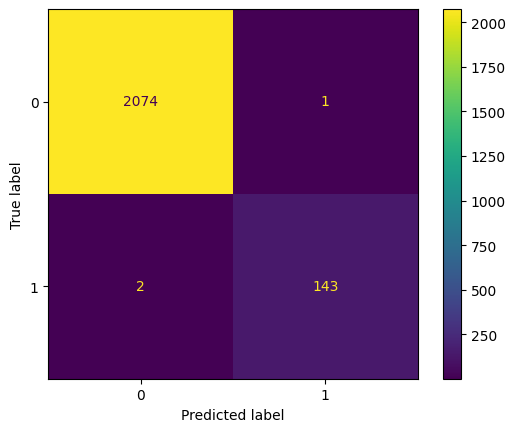

In [12]:
evaluar_modelo(dtc, test_data, test_labels)

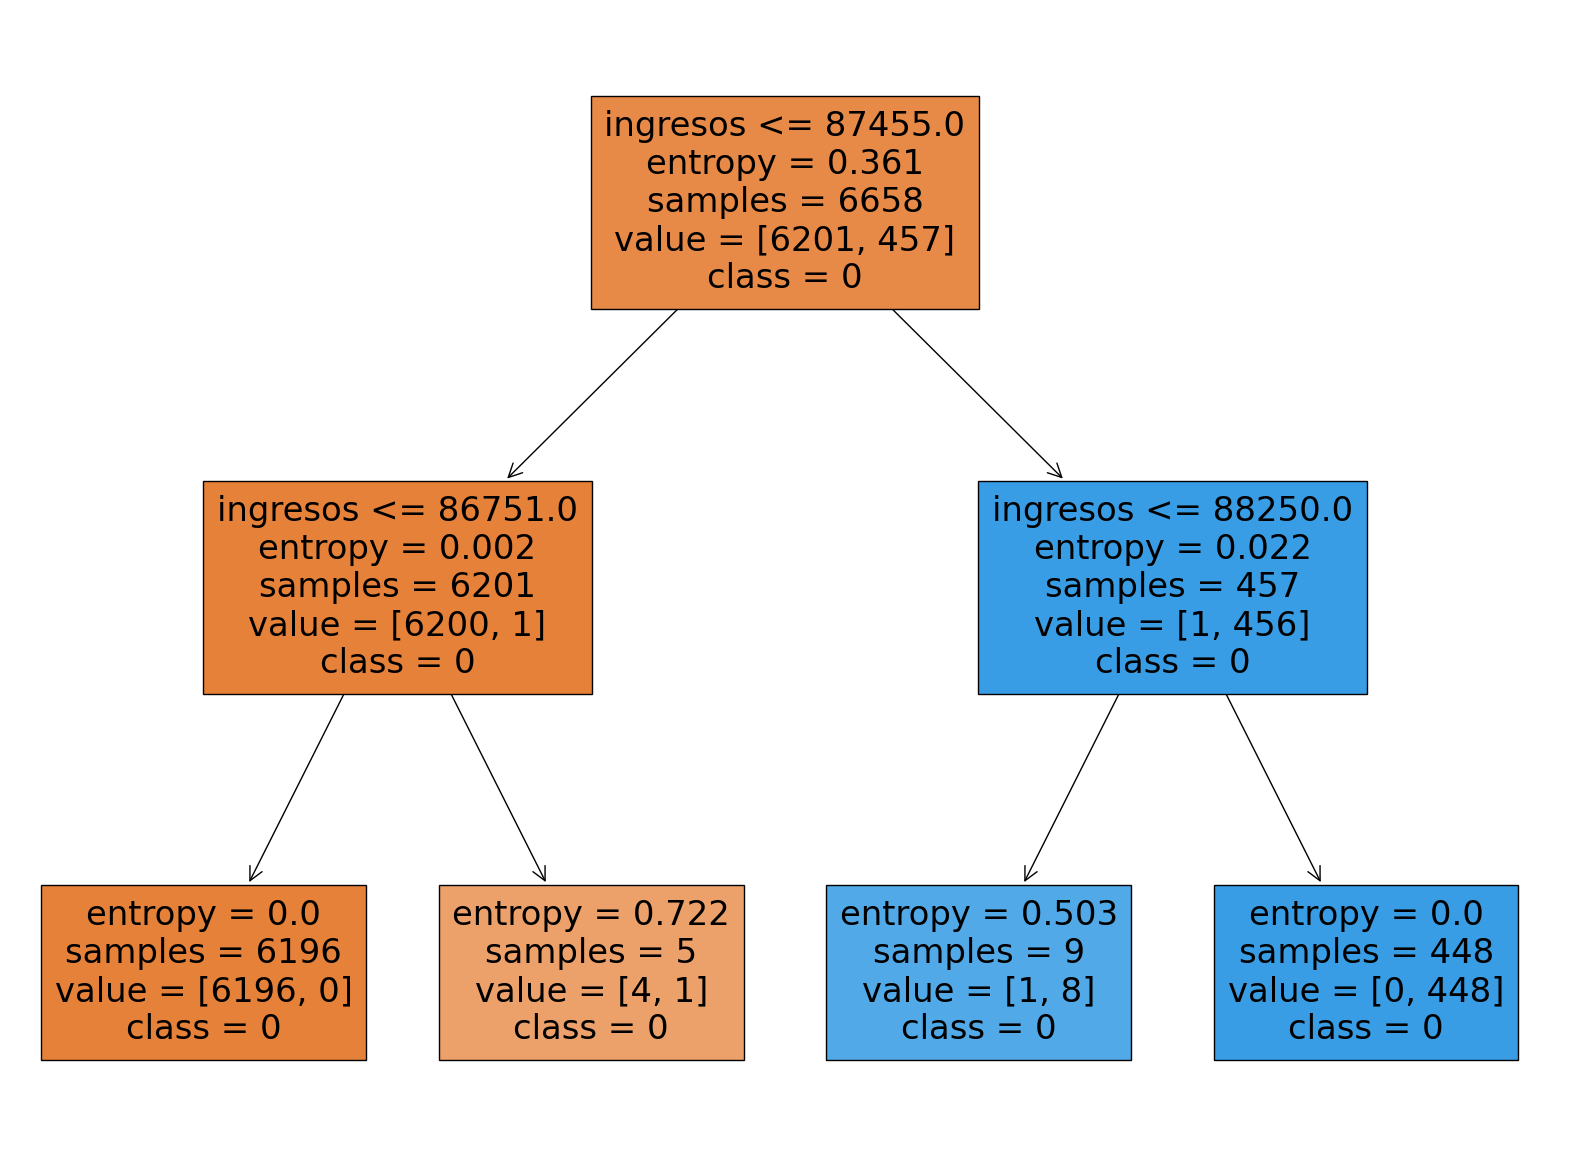

In [13]:
# Plot the decision tree
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

----

# Experimento #2 - Resultados AgglomerativeClustering k=2

### Lectura del dataset generado previamente

In [14]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../../data/experimentacion_clustering/resultados_agc_k2.csv', sep=';')
datos.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,cluster
0,21,1000,2,5.0,9600,0.10,11.14,0,39.0,1144.0,...,False,False,True,False,False,False,True,False,False,0
1,23,35000,2,4.0,65500,0.53,15.23,1,36.0,1887.0,...,False,False,True,False,False,False,False,True,False,0
2,24,35000,4,8.0,54400,0.55,14.27,1,54.0,1314.0,...,False,False,True,True,False,False,False,False,False,0
3,21,2500,2,2.0,9900,0.25,7.14,1,34.0,1171.0,...,False,True,False,False,False,False,True,False,False,0
4,26,35000,3,8.0,77100,0.45,12.42,1,21.0,816.0,...,False,False,True,False,False,False,False,False,True,0


### Armado de los sets de entrenamiento y testeo

In [15]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.cluster.values
labels = labels.astype('str') # Modificación para asignar el valor

features = datos[['edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'pct_ingreso', 'tasa_interes',
       'estado_credito', 'antiguedad_cliente', 'gastos_ult_12m',
       'limite_credito_tc', 'operaciones_ult_12m', 'personas_a_cargo',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO',
       'estado_civil_DESCONOCIDO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTERO', 'estado_cliente_ACTIVO',
       'estado_cliente_PASIVO', 'genero_F', 'genero_M',
       'nivel_educativo_DESCONOCIDO', 'nivel_educativo_POSGRADO_COMPLETO',
       'nivel_educativo_POSGRADO_INCOMPLETO',
       'nivel_educativo_SECUNDARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_INCOMPLETO']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,21,1000,2,5.0,9600,0.10,11.14,0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
1,23,35000,2,4.0,65500,0.53,15.23,1,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
2,24,35000,4,8.0,54400,0.55,14.27,1,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False
3,21,2500,2,2.0,9900,0.25,7.14,1,34.0,1171.0,...,True,False,True,False,False,False,False,True,False,False
4,26,35000,3,8.0,77100,0.45,12.42,1,21.0,816.0,...,True,False,False,True,False,False,False,False,False,True


In [16]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,21,1000,2,5.0,9600,0.10,11.14,0,39.0,1144.0,...,True,False,False,True,False,False,False,True,False,False
1,23,35000,2,4.0,65500,0.53,15.23,1,36.0,1887.0,...,True,False,False,True,False,False,False,False,True,False
2,24,35000,4,8.0,54400,0.55,14.27,1,54.0,1314.0,...,True,False,False,True,True,False,False,False,False,False
3,21,2500,2,2.0,9900,0.25,7.14,1,34.0,1171.0,...,True,False,True,False,False,False,False,True,False,False
4,26,35000,3,8.0,77100,0.45,12.42,1,21.0,816.0,...,True,False,False,True,False,False,False,False,False,True


In [17]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [18]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
edad                                           23.0
importe_solicitado                           6000.0
duracion_credito                                4.0
antiguedad_empleado                             2.0
ingresos                                    42000.0
pct_ingreso                                    0.14
tasa_interes                                  12.41
estado_credito                                  1.0
antiguedad_cliente                             43.0
gastos_ult_12m                               4122.0
limite_credito_tc                           18379.0
operaciones_ult_12m                            70.0
personas_a_cargo                                2.0
situacion_vivienda_ALQUILER                    True
situacion_vivienda_HIPOTECA                   False
situacion_vivienda_OTROS                      False
situacion_vivienda_PROPIA                     False
objetivo_credito_EDUCACIÓN                    False
objetivo_credito_INVERSIONES     

Utilizamos la función evaluar_modelo definida y ejecutada en el primer experimento. No es necesario volver a incluirla en este.

### Generación de modelos

Se pasa a configurar la serie de experimentos en **mlflow**

In [19]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Reglas - Prueba #2 - AGC K=2")
mlflow.autolog()

2024/05/05 18:30:30 INFO mlflow.tracking.fluent: Experiment with name 'Reglas - Prueba #2 - AGC K=2' does not exist. Creating a new experiment.
2024/05/05 18:30:30 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/05/05 18:30:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Árboles de Decisión (TDIDT)

Como los clusters resultantes del modelo AGC con k=2 resultaban desbalanceados (cluster 0 = 8508, cluster 1 = 370), aumentamos el hiperparametro max_depth a 6 para dotar de complejdad al modelo.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=6, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

2024/05/05 18:37:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\elisa\OneDrive\MÁSTER\13MBID\13MBID-OCT2324\.venv\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


In [21]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

2024/05/05 18:38:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\elisa\OneDrive\MÁSTER\13MBID\13MBID-OCT2324\.venv\Lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


Rendimiento obtenido: 0.9986486486486487
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2130
           1       0.98      0.99      0.98        90

    accuracy                           1.00      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       1.00      1.00      1.00      2220

Matriz de confusión:


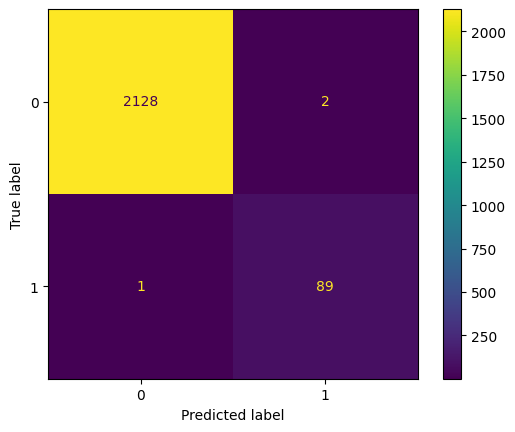

In [22]:
evaluar_modelo(dtc, test_data, test_labels)

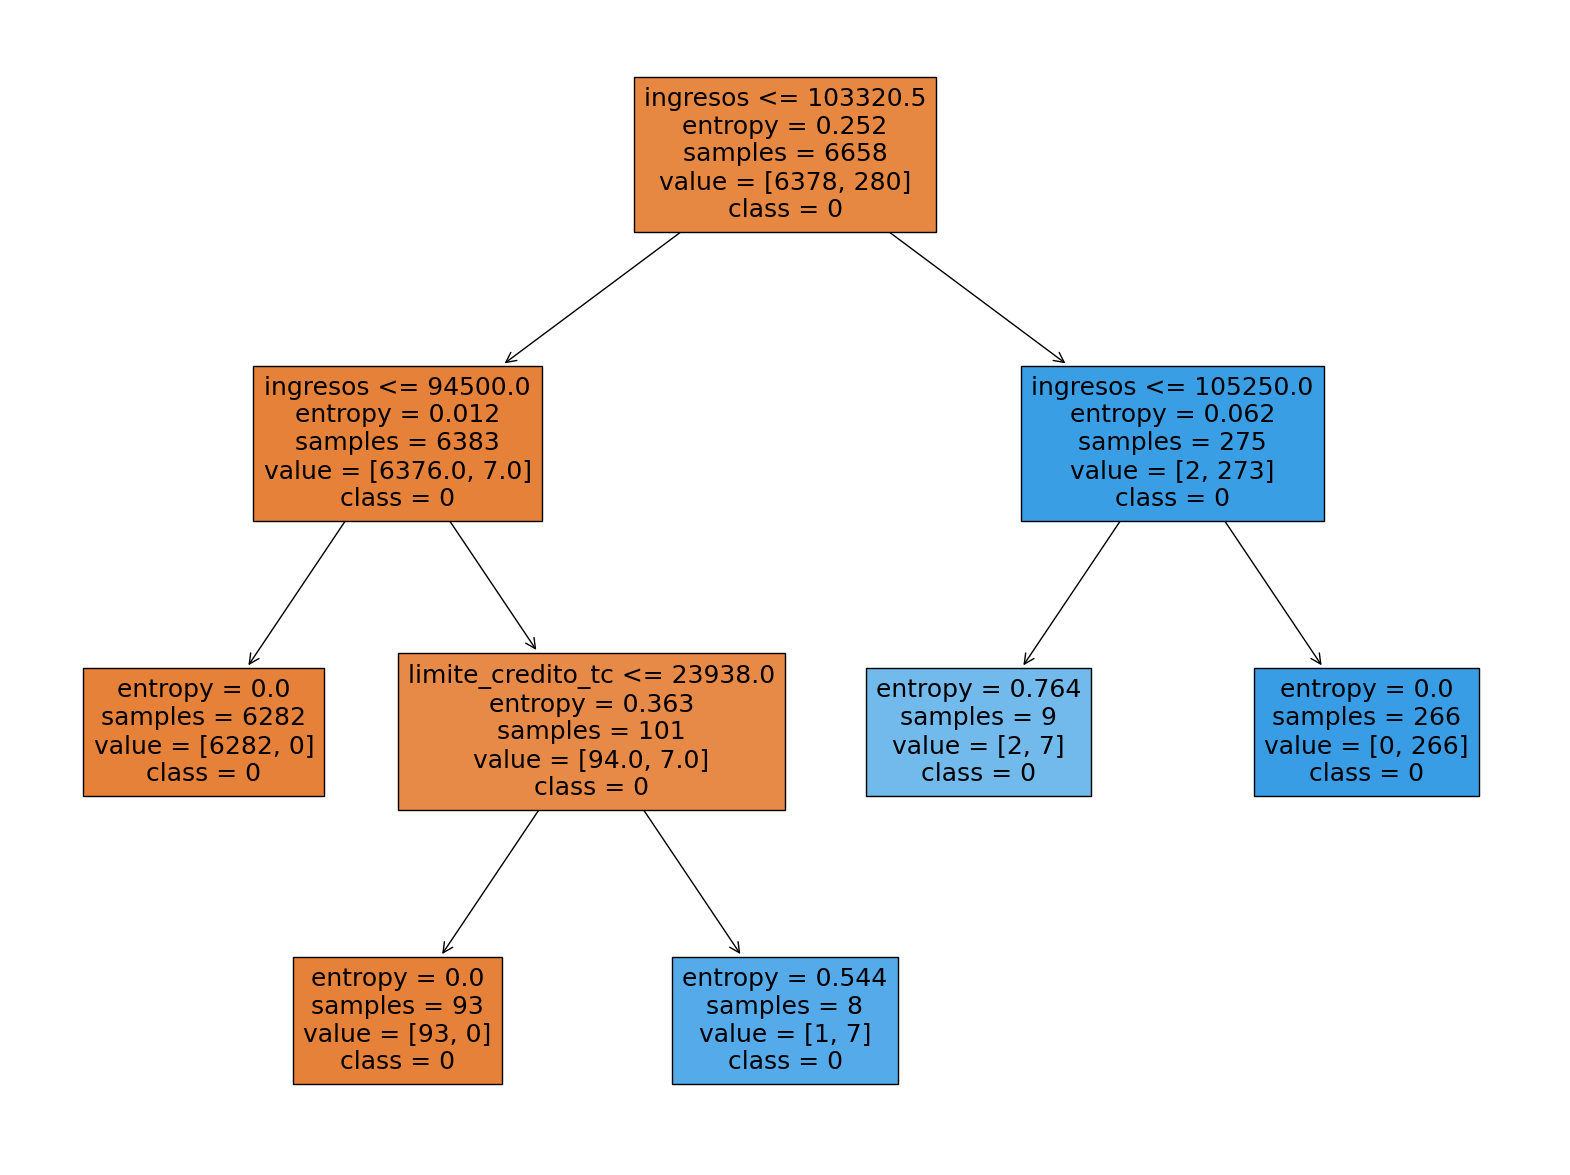

In [23]:
# Plot the decision tree
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()